In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ushape.csv',header=None,names=['X','Y','class'])

In [3]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


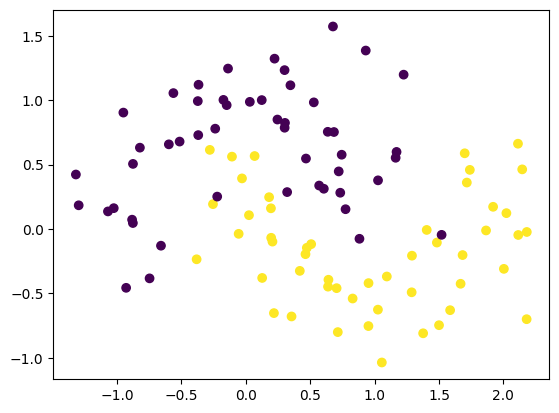

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.get_weights()

[array([[ 0.8369689 ,  1.509076  , -1.4461945 , -0.23933181,  0.8897137 ,
          0.9646636 , -0.29848424, -1.4097667 , -0.90116215, -0.8183014 ],
        [ 1.1208299 ,  0.8748434 ,  0.37922794, -2.0851452 ,  1.7226564 ,
          0.34177506,  0.19386649, -0.7491246 ,  0.35489273,  0.35314476]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.14851213, -0.37569344,  0.03562891, -0.7392311 ,  0.20641449,
          0.39021668,  0.43052822,  0.1581202 ,  0.2720796 , -0.68365   ],
        [ 0.07006045, -0.38818538, -0.03495454,  0.6694765 ,  0.5587636 ,
          0.5421767 , -0.24608847, -0.32725257,  0.6691851 ,  1.0088558 ],
        [ 0.9094578 , -0.27860585,  0.5018358 ,  0.05820372,  0.03083267,
         -0.3498667 ,  0.09961418, -0.18182209, -0.12597564, -0.80059904],
        [ 0.02148616, -0.08064658, -0.330892  , -0.72335863,  0.27713335,
         -0.20152849,  0.49678054, -0.65114164, -0.69661343,  0.08972004],
        [ 0.04071

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[ 0.9739067 , -0.94212514,  0.9226702 , -1.1518627 ,  0.38923085,
          0.66459316, -0.63121414, -0.3319518 , -0.7908756 , -0.80205625],
        [ 0.4582116 , -0.24089697,  0.00363804,  1.2659942 ,  1.1218784 ,
          0.97204953, -0.1193222 ,  0.17072663, -1.2100492 , -0.29604685]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.27815345, -0.19818108,  0.07254711, -0.1796243 , -0.7978651 ,
         -0.5603083 ,  0.18220353,  0.5195473 ,  0.2353401 ,  0.43716332],
        [ 0.0066909 , -0.67569566,  0.01131806, -0.802912  , -0.35135862,
         -0.34495705, -0.13550183, -0.59442693, -0.08604322, -0.19166577],
        [ 0.96453637,  0.24301323,  0.25030655, -0.10928404, -0.02790364,
         -0.5104003 ,  0.01346875, -0.13005611, -0.2710808 , -0.1715726 ],
        [ 0.12251341,  0.4208899 ,  0.3698088 ,  0.2776987 ,  0.8188309 ,
          0.00536909, -0.28647715,  0.17590742,  0.06651311, -0.10132799],
        [ 0.09998

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 574ms/step - accuracy: 0.6406 - loss: 0.6666 - val_accuracy: 0.6500 - val_loss: 0.6664
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7273 - loss: 0.6675 - val_accuracy: 0.8000 - val_loss: 0.6598
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7555 - loss: 0.6625 - val_accuracy: 0.8500 - val_loss: 0.6538
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7703 - loss: 0.6562 - val_accuracy: 0.8500 - val_loss: 0.6480
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8062 - loss: 0.6501 - val_accuracy: 0.8000 - val_loss: 0.6428
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7852 - loss: 0.6506 - val_accuracy: 0.8500 - val_loss: 0.6377
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8539 - loss: 0.6394 - val_accuracy: 0.8500 - val_loss: 0.6323
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8047 - loss: 0.6399 - val_accuracy: 0.9000 - val_loss

In [15]:
model.get_weights()

[array([[ 0.98230034, -0.7765809 ,  1.0733738 , -1.1106453 ,  0.48265663,
          0.6872358 , -0.69321054, -0.13343757, -0.7536186 , -1.0594963 ],
        [ 0.31949484, -0.27549842, -0.2574182 ,  1.4308256 ,  1.334889  ,
          1.1919523 , -0.20823798,  0.05585298, -1.4235095 , -0.2267886 ]],
       dtype=float32),
 array([ 0.0059393 ,  0.01757498,  0.00413145,  0.01255488,  0.14117336,
         0.11707877, -0.06565767, -0.15770154,  0.29487753, -0.01421591],
       dtype=float32),
 array([[-0.18244433, -0.19068275,  0.25735965, -0.15451294, -0.5792078 ,
         -0.39259967,  0.2620344 ,  0.7070888 ,  0.33909085,  0.45031297],
        [-0.14449246, -0.41399413,  0.21569514, -0.65471315, -0.16774593,
         -0.29903105, -0.34685704, -0.51227766,  0.13431202, -0.12312766],
        [ 1.1422715 ,  0.17440727,  0.4776382 , -0.12646864,  0.13939352,
         -0.38533396,  0.09755926,  0.11003873, -0.25004858, -0.2356764 ],
        [-0.02785755,  0.5551856 ,  0.4783116 ,  0.34048742, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

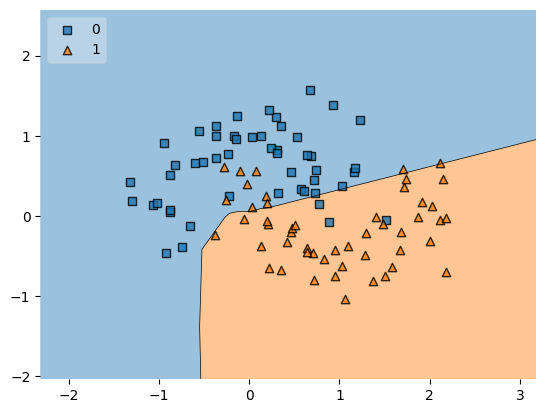

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [17]:
(np.random.randn(10,10)*0.01).min()

-0.028942432128247746

In [18]:
(np.random.randn(10,10)*0.01).max()

0.03734486531189359